<a href="https://colab.research.google.com/github/vyshnavi2001/NNDL/blob/main/ASSIGNMENT8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded=files.upload()

Saving slr08.xls to slr08 (1).xls


In [4]:
data = pd.read_excel('slr08.xls')
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [5]:
data.describe()

,X,Y
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


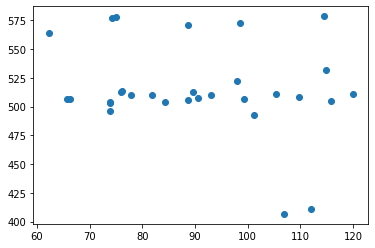

In [6]:
y = data.iloc[:,1]
x = data.iloc[:,0]

plt.scatter(x,y)

In [7]:
threshold = 3
z = np.abs(stats.zscore(x))
outliers = np.where(z > threshold)
print(outliers[0])

[]


In [8]:
x = minmax_scale(x)
y = minmax_scale(y)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

24
24
6
6


In [10]:
def gradientm(x,y,m,c):
  sum = 0
  number_of_samples = len(x)
  for i in range(number_of_samples):
    gradm_of_i = (y[i]- m*x[i] - c)*x[i]
    sum = sum + gradm_of_i
  gradm = -1*(1/number_of_samples)*sum
  return gradm

def gradientc(x,y,m,c):
  sum = 0
  number_of_samples = len(x)
  for i in range(number_of_samples):
    gradc_of_i = (y[i]- m*x[i] - c)
    sum = sum + gradc_of_i
  gradc = -1*(1/number_of_samples)*sum
  return gradc

def error(x,y,m,c):
  number_of_samples = len(x)
  for i in range(number_of_samples):
    error_value = 1*0.5*(1/number_of_samples)*math.pow((y[i] - m*x[i] - c), 2)
  return error_value

In [11]:
m=1
c = -1

learning_rate = 0.1
epochs = 300
error_list = []

for i in range(epochs):
  error_list.append(error(x,y,m,c))
  deltam = -1*learning_rate*gradientm(x,y,m,c)
  deltac = -1*learning_rate*gradientc(x,y,m,c)
  m = m + deltam
  c = c + deltac

Text(0.5, 1.0, 'error graph in case of Batch')

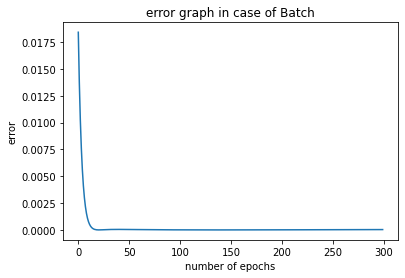

In [12]:
x1 = range(epochs)
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of epochs")
plt.ylabel("error")
plt.title("error graph in case of Batch")

In [13]:
train_error = error(x_train,y_train,m,c)
test_error = error(x_test,y_test,m,c)

print("training error : ",train_error)
print("testing error : ",test_error)

training error :  4.5866341654055075e-05
testing error :  0.033397925240757964


Text(0.5, 1.0, 'line which is generated after training')

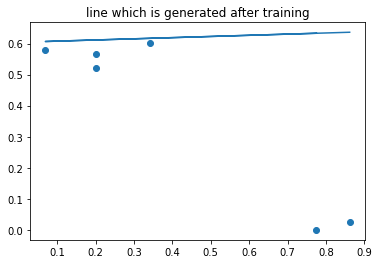

In [14]:
x2 = x_test
y2 = [m*i+c for i in x2]

x1 = x_test
y1 = y_test

plt.plot(x2,y2)

plt.scatter(x1,y1)

plt.title("line which is generated after training")

In [17]:
pressure_max = 120.000000
pressure_min = 62.200000

weight_max = 578.600000
weight_min = 406.700000

actual_pressure = float(input("enter the pressure value : "))
scaled_pressure = (actual_pressure - pressure_min)/(pressure_max-pressure_min)

scaled_weight = scaled_pressure*m+c
predicted_weight = scaled_weight*(weight_max-weight_min)+weight_min

print("the predicted weight : ",predicted_weight)

enter the pressure value : 70
the predicted weight :  511.38468766847336
